# Ames Housing Project Exploratory Data Analysis

## Step 1: Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance



plt.rcParams.update({'figure.figsize': (7.0, 5.0)})
plt.rcParams.update({'font.size': 14})

import sys  
sys.path.insert(0, 'C:/Users/Beth & Andrew/Documents/GitHub/DataScienceGuidedCapstone/Notebooks/library/')
from sb_utils import save_file 


## Step 2: Load the data

In [2]:
housing_data = pd.read_csv('housing_data_cleaned.csv')

## Step3:  Summary of Data

In [3]:
housing_data.head

<bound method NDFrame.head of       Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Alle

In [4]:
housing_data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


#### Our target is the Sale Price.  It is a continuous variable.  Lets look at it first


In [5]:
print(housing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

## Step 4  Look at Sale Price Variable (Univariate Analysis)

Text(0.5, 1.0, 'Histogram of target variable Sales Price')

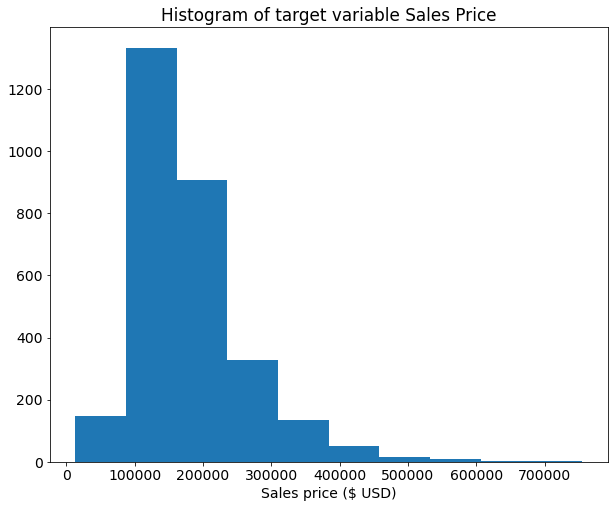

In [94]:
plt.rcParams.update({'figure.figsize': (10, 8.0)})
plt.rcParams.update({'font.size': 14})


plt.hist(housing_data['SalePrice'])
plt.xlabel('Sales price ($ USD)')
plt.title('Histogram of target variable Sales Price')

We see our sales price is skewed to the right with a few sales price well above the mean.  The bulk of the sales are around the mean sales price of $180K.

In [7]:
housing_data['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Step 5: Bivariate Analysis

#### Lets look at some correlations and a heatmap

In [8]:
housing_data.corr()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285


Ok.  That is interesting.  I notice overall quality is highly correlated with the sales price.  Also highly correlated is year of most recent addtion / remodel.  Lets see how our pairplot looks...

In [9]:
##print(sns.pairplot(housing_data))

The pairplot takes too long to run, so lets have a look at our heatmap.

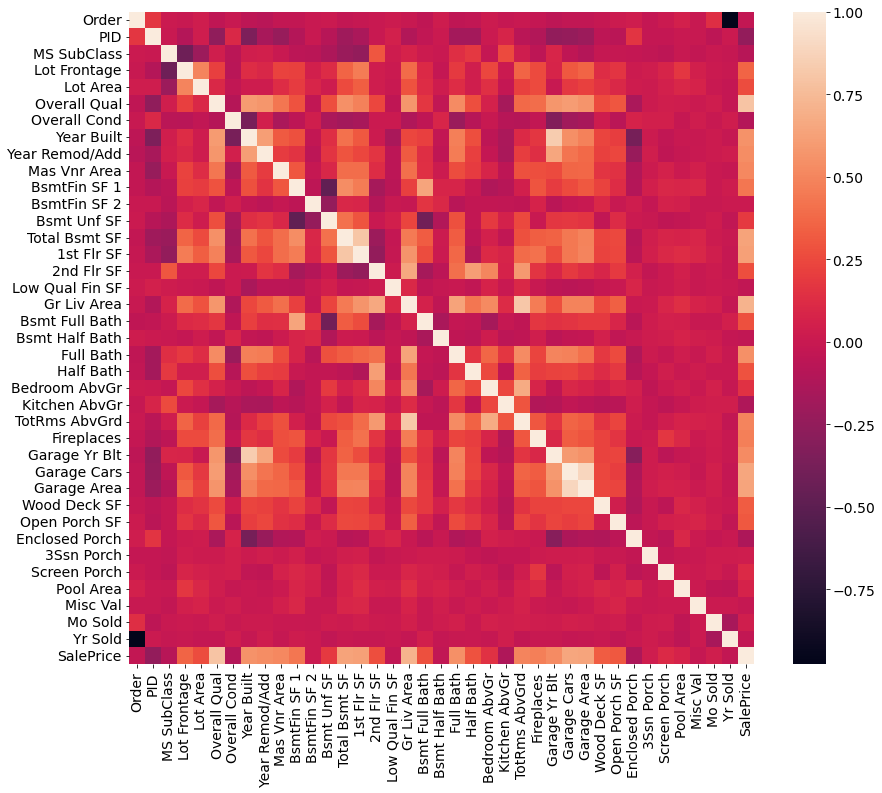

In [95]:
plt.subplots(figsize=(14,12))
sns.heatmap(housing_data.corr());

Great.  Right off the bat we can see a high positive correlation between sales price and a few variables including:  Overall Qual, Gr Liv Area, Full Bath, Garage Cars and more. 


Subsetting our data into numeric (integer and float) variables and object variables

In [11]:
integer_columns = housing_data.select_dtypes(include=['int64']).columns
float_columns = housing_data.select_dtypes(include=['float64']).columns
#numeric_columns = integer_columns + float_columns
object_columns = housing_data.select_dtypes(include=['object']).columns

In [12]:
numeric_columns = integer_columns.append(float_columns)

In [13]:
#numeric_columns.values.tolist()

In [119]:
list_variables = ['PID',
 'MS SubClass',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'Lot Frontage',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area']

For our 38 variables with numeric value we are going to look at a scatter plot of the variable plotted with the sales price to visualize correlations between each 'numeric' variable and the target variable.

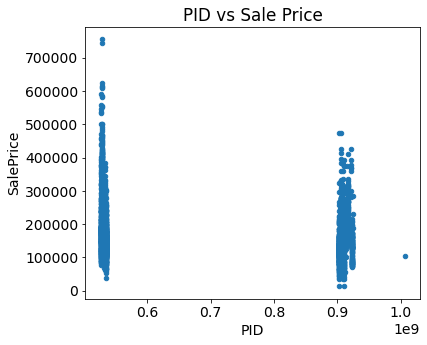

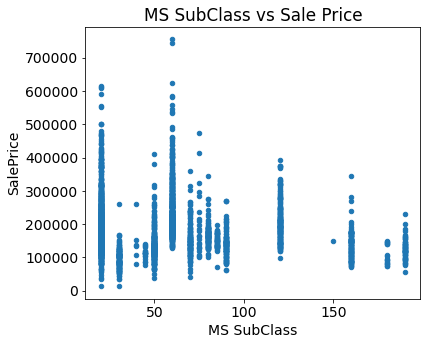

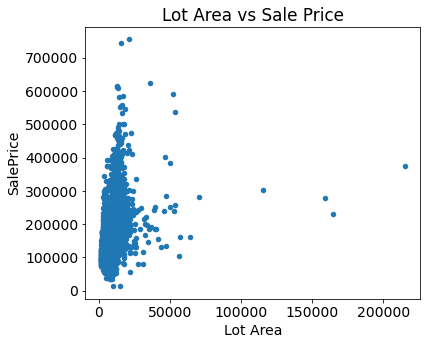

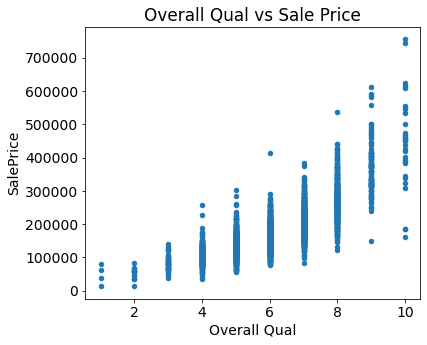

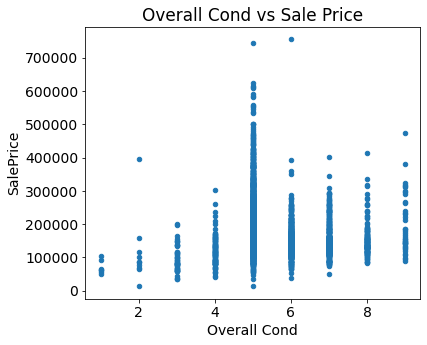

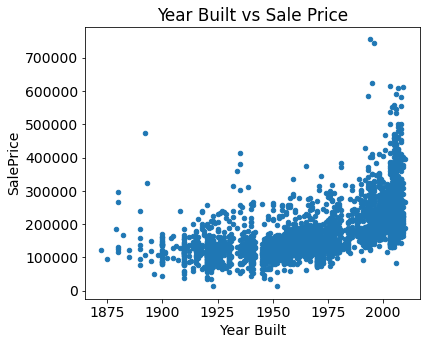

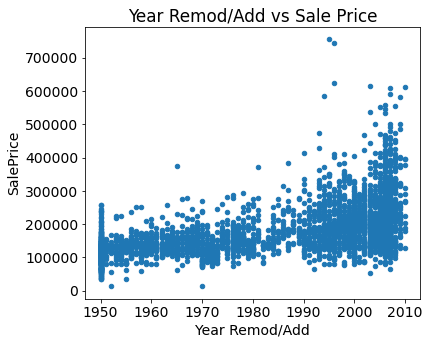

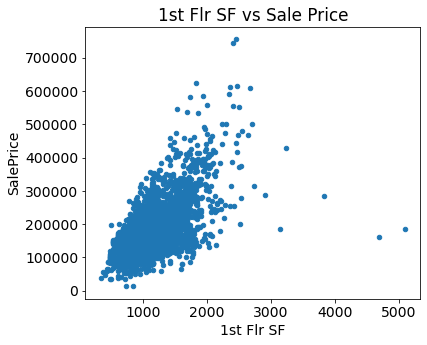

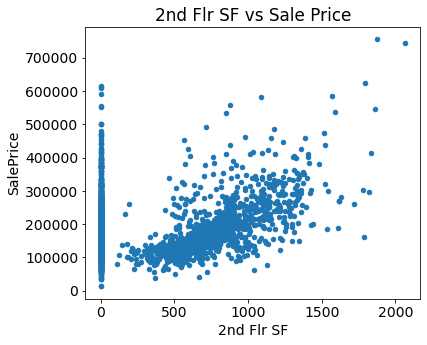

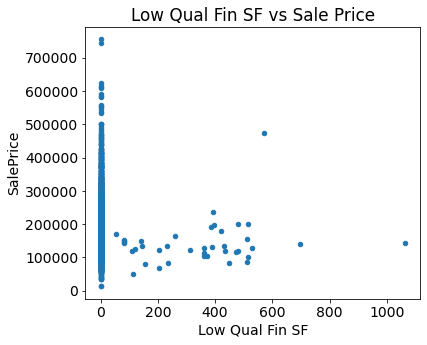

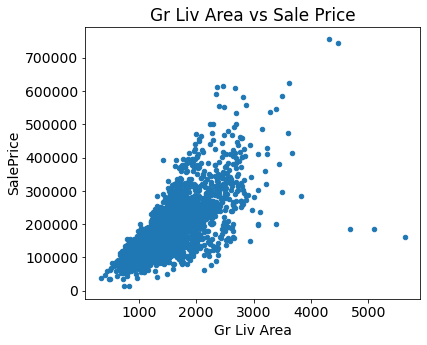

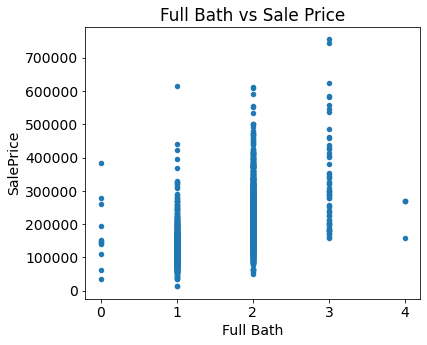

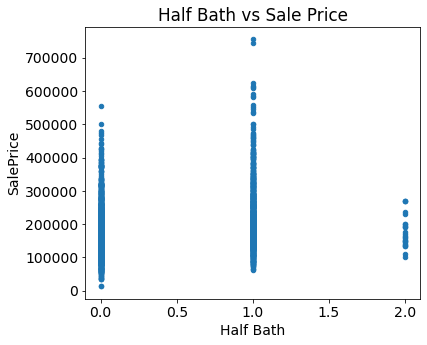

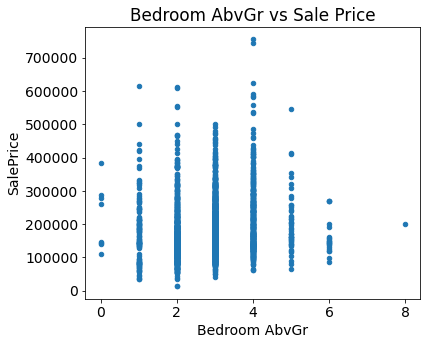

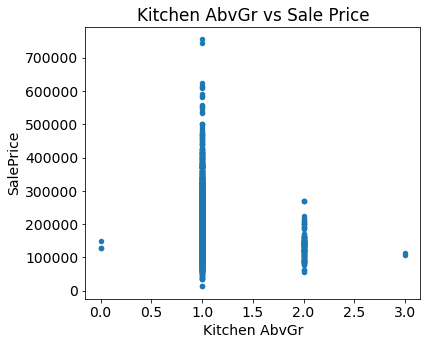

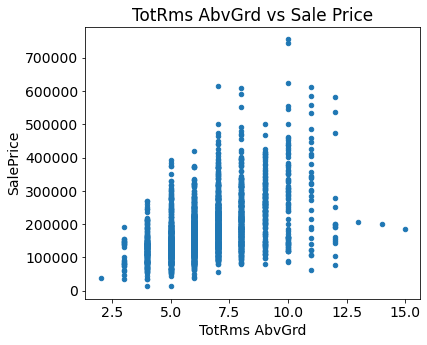

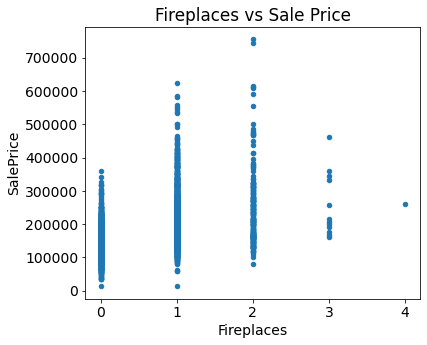

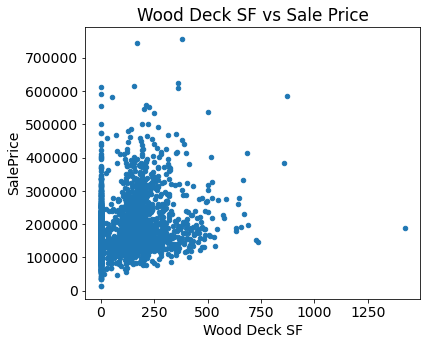

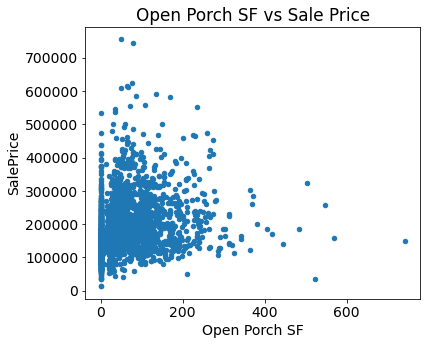

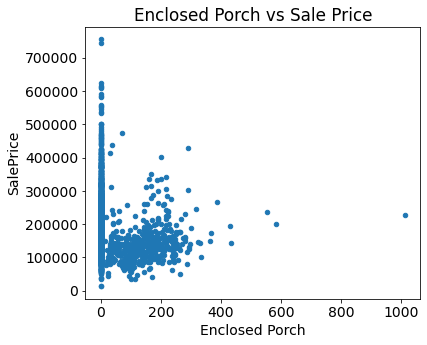

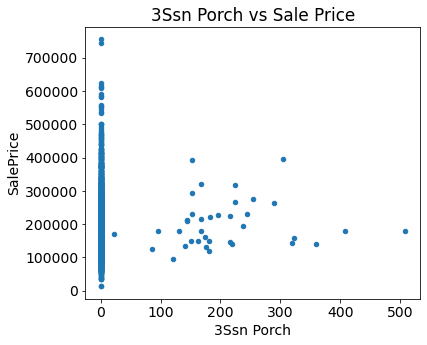

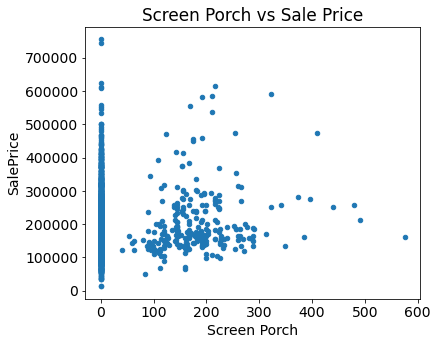

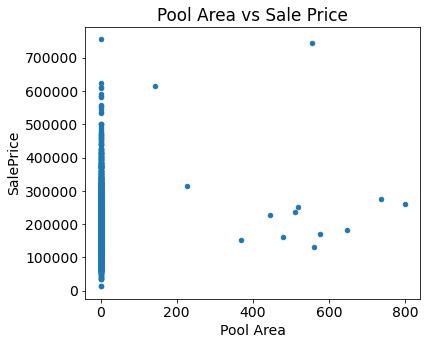

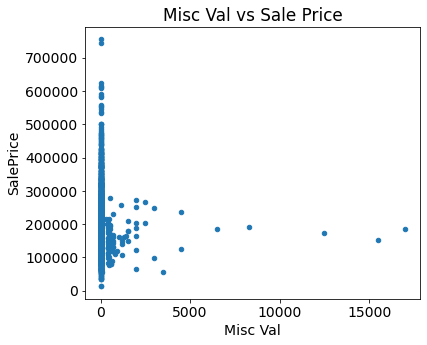

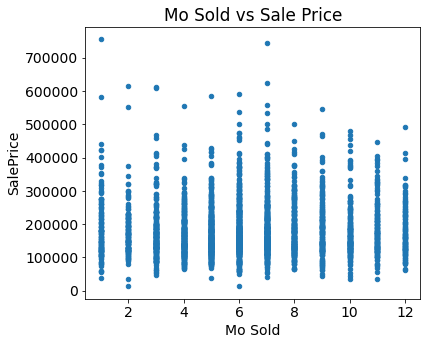

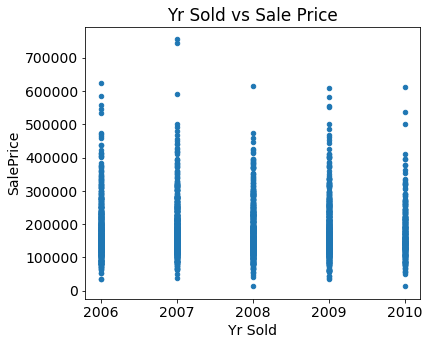

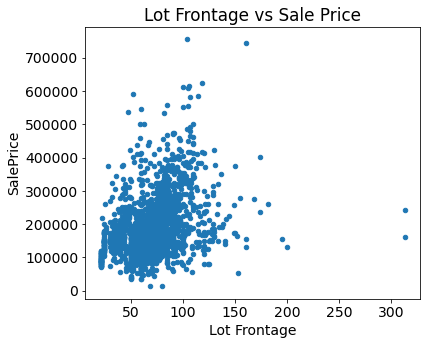

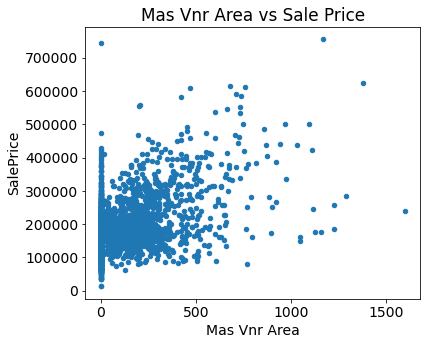

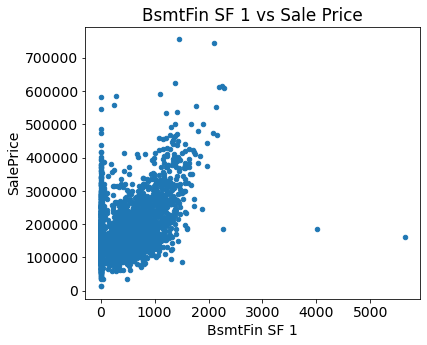

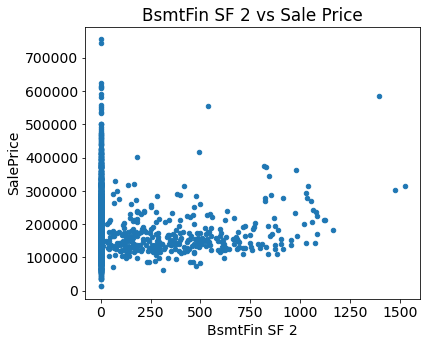

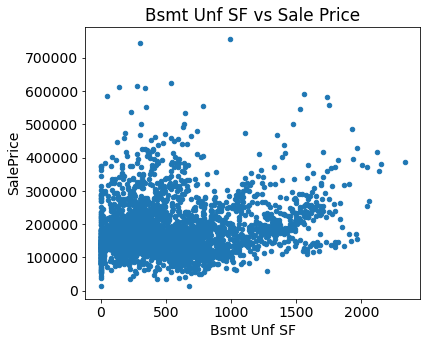

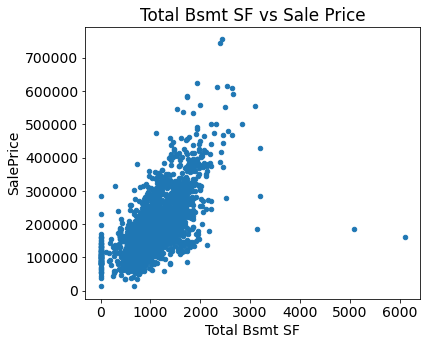

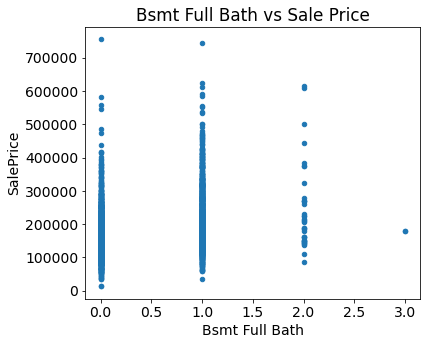

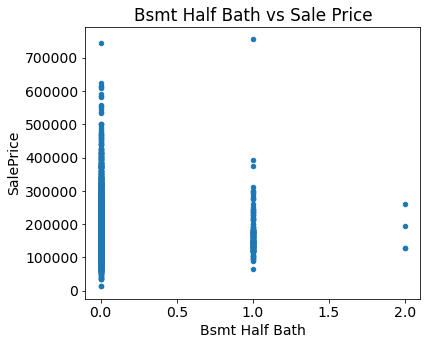

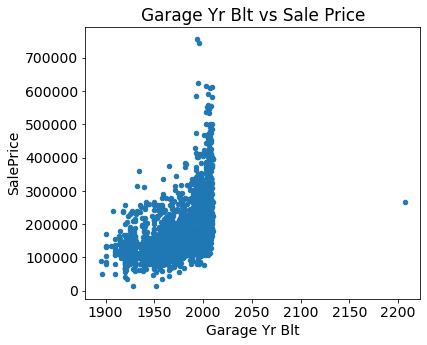

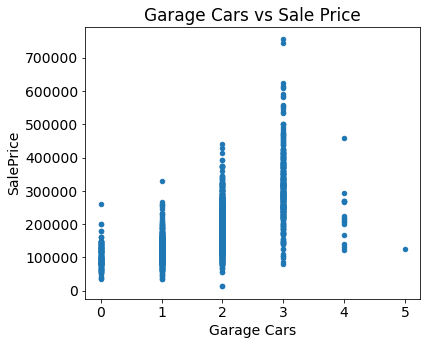

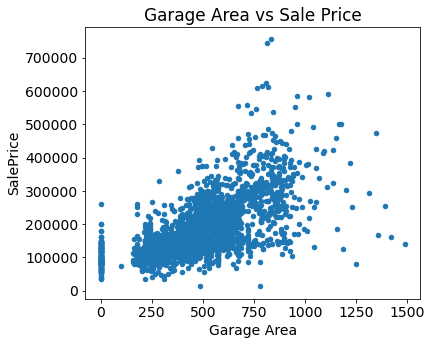

In [120]:
#  Make some plots of our numeric variables
for item in list_variables:
    housing_data.plot(x = item, y = 'SalePrice', kind = 'scatter', figsize = (6, 5))
    plt.title(item + " vs Sale Price")
    plt.show()

This is promising.  The above charts represent a comparison of our numeric variables (those with float or integer data types) compared to our sales price.  In the charts we see a hand full of variables that clearly show a correlation with our target variable.  These include:  Overal Qual, Year Built, 1st Fl SF, 2n Fl Sf, Gr Liv Ar (the previous three variables are for square footage of the first, the second and the total square foot of living area) also correlated are Total Basement Sf, Garage Cars , and Garage Area.  Of note:  Pool Area - we kept this variable but it doesnt seem to be highly correlated with our target variable.  Also Garage Year Blt show an outlier of a date in the future. 

In [17]:
#object_columns.values.tolist()

In [18]:
## this list is of variables that are not numeric in type.  they are 'objects'
list_2 = ['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Sale Type',
 'Sale Condition']

For our object variables we can go ahead and create a box plot of showing the category and compare to the sales price.

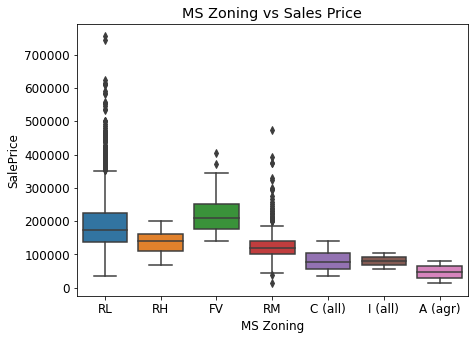

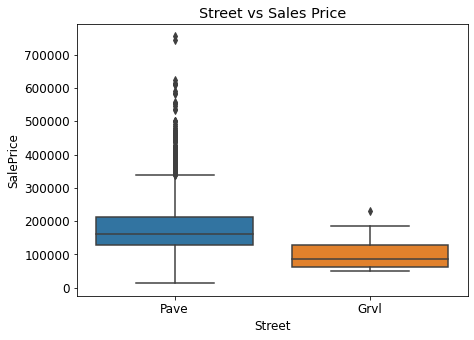

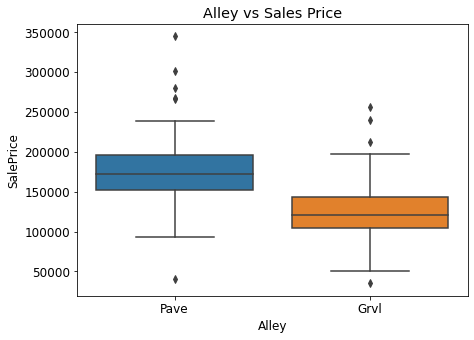

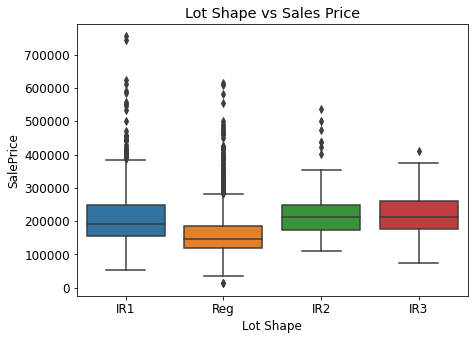

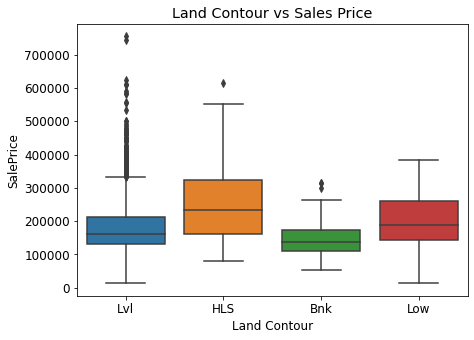

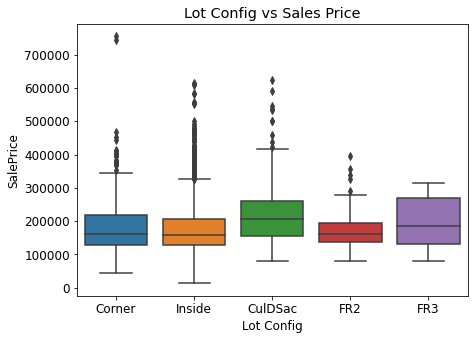

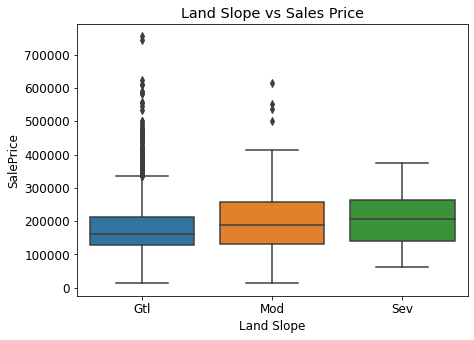

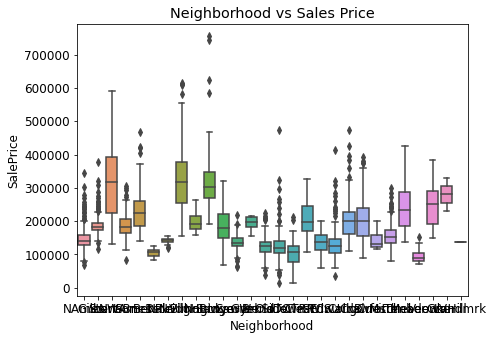

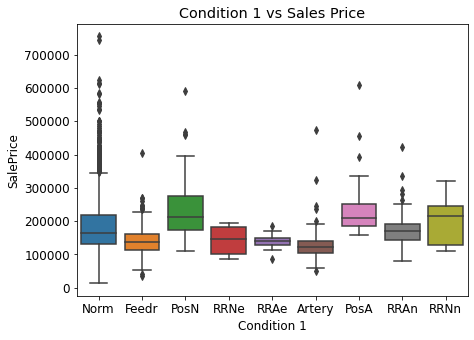

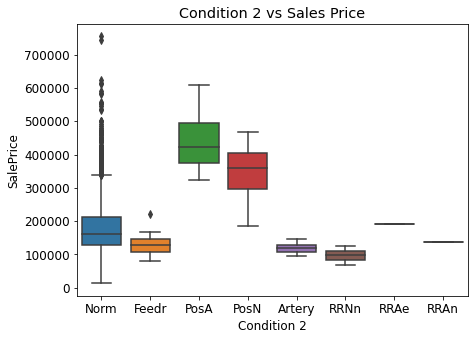

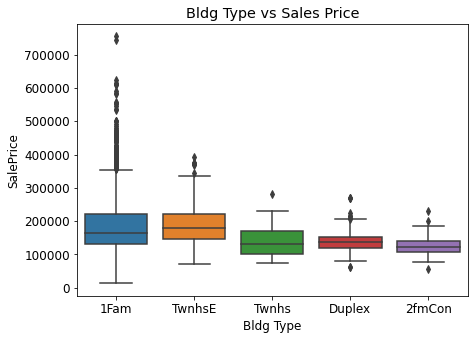

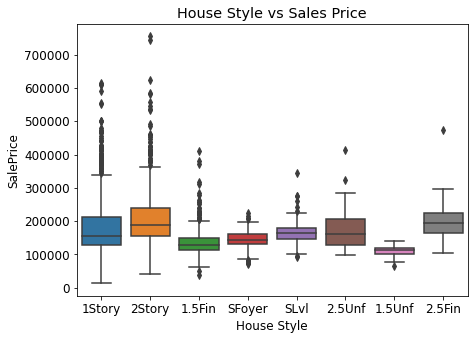

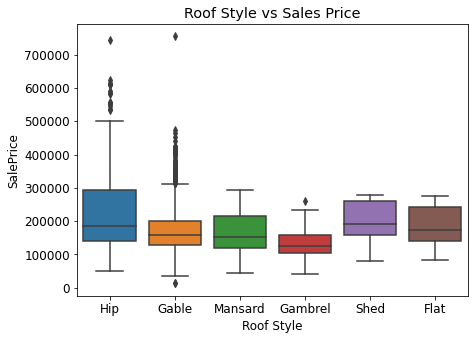

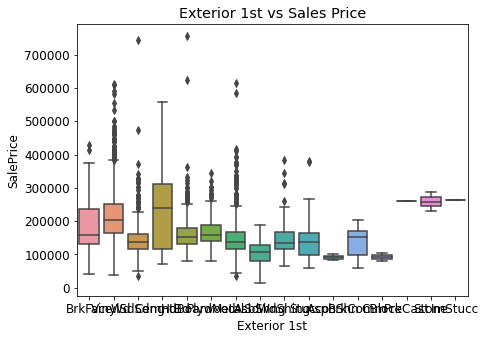

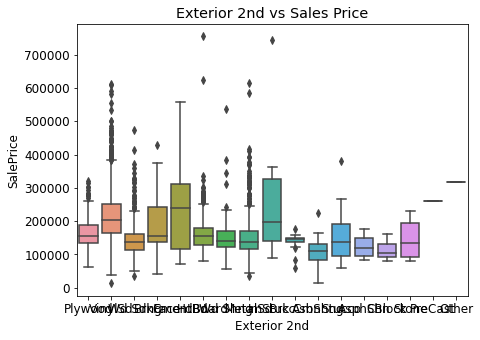

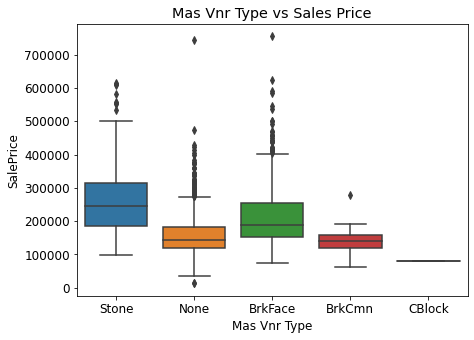

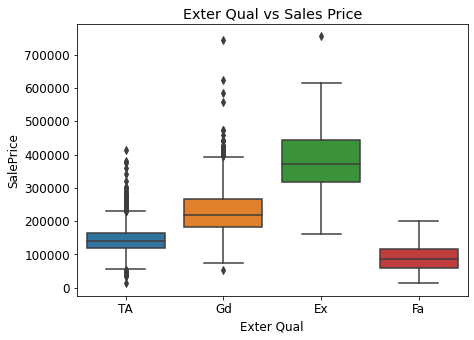

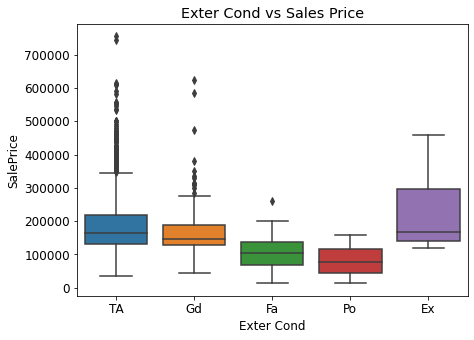

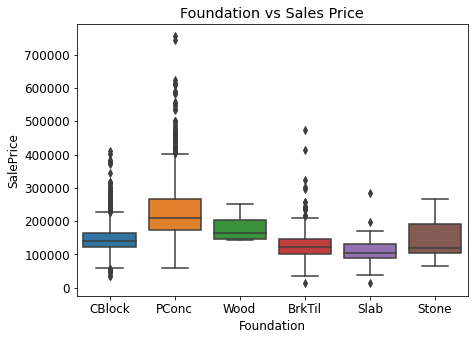

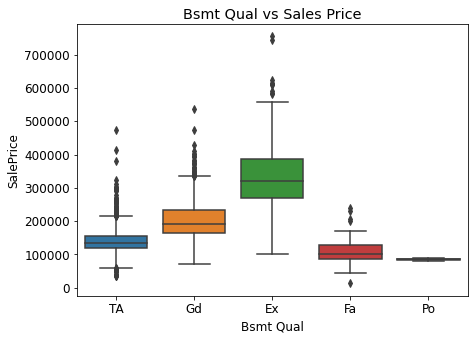

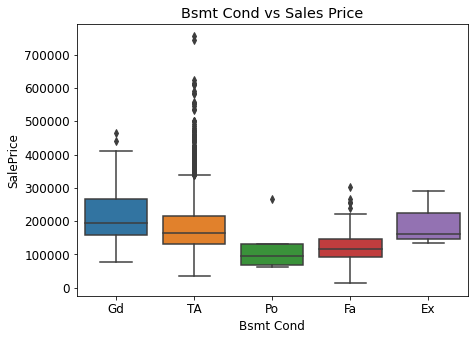

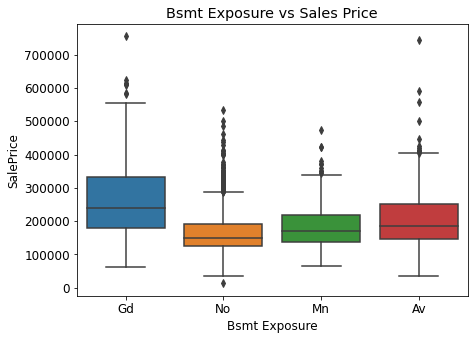

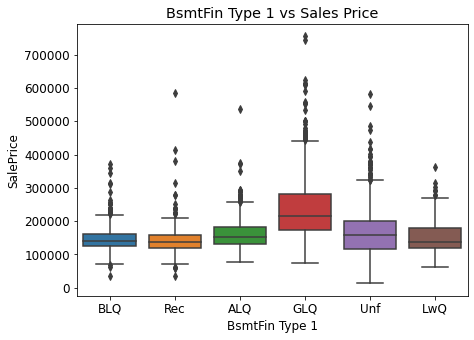

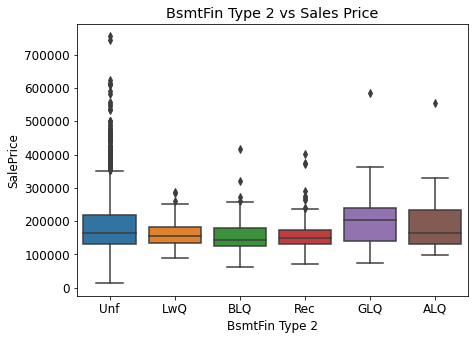

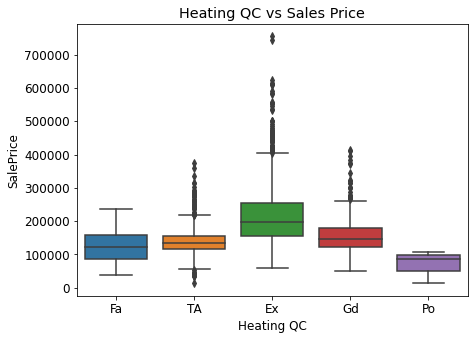

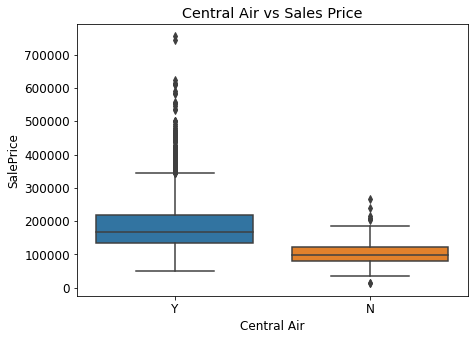

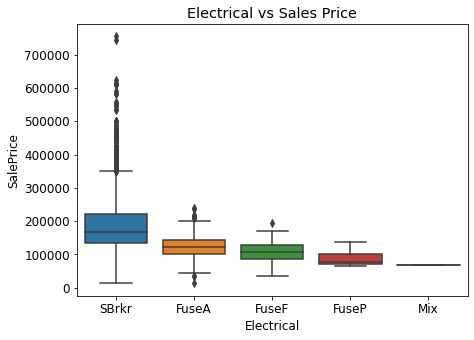

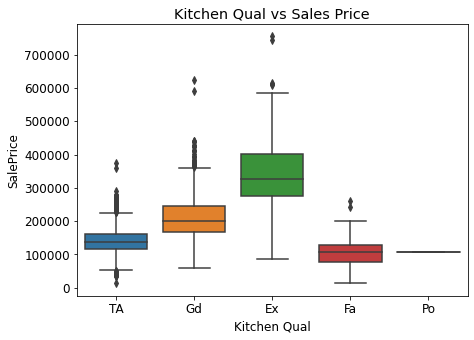

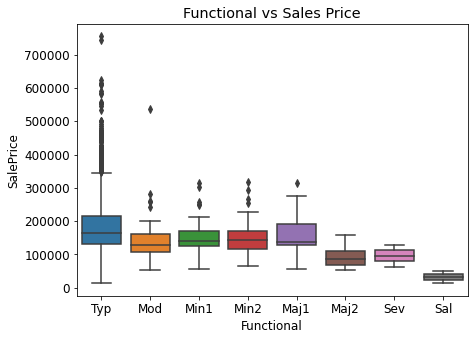

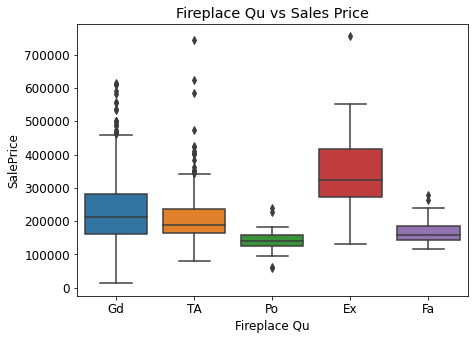

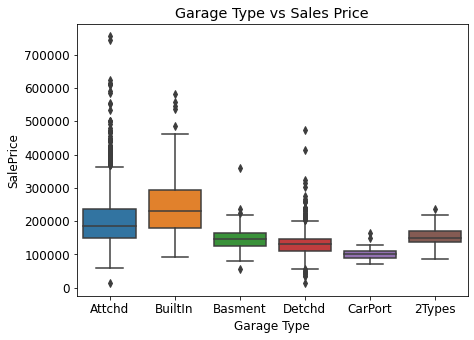

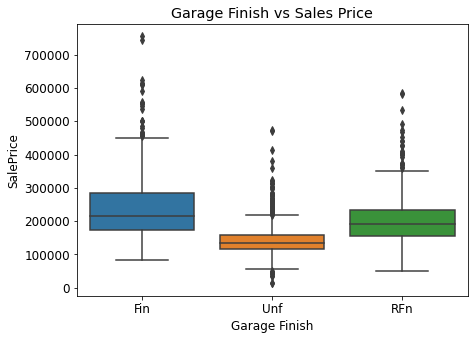

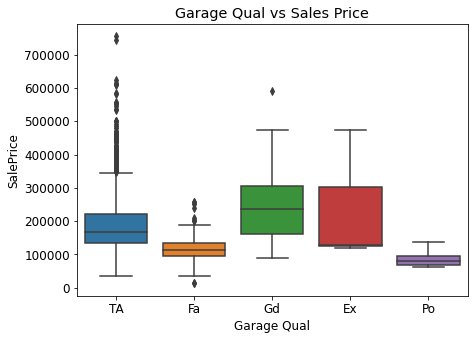

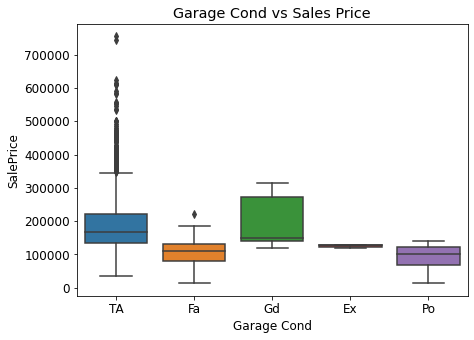

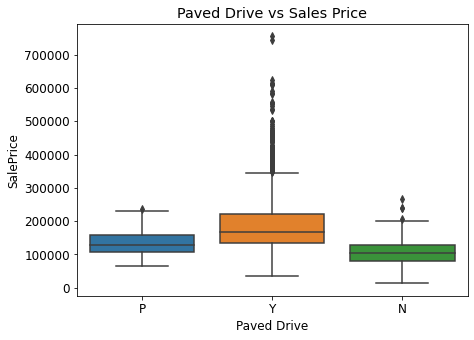

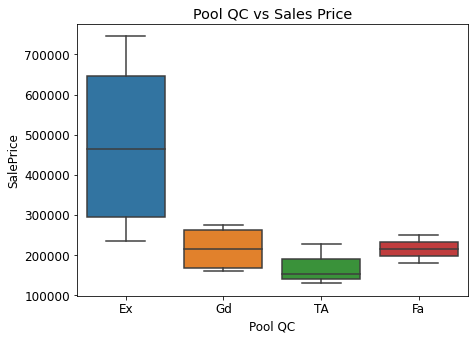

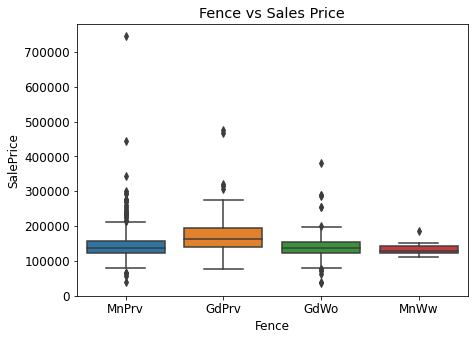

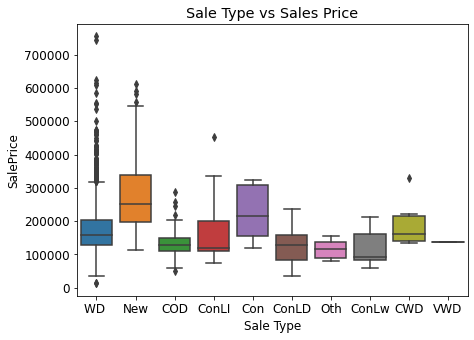

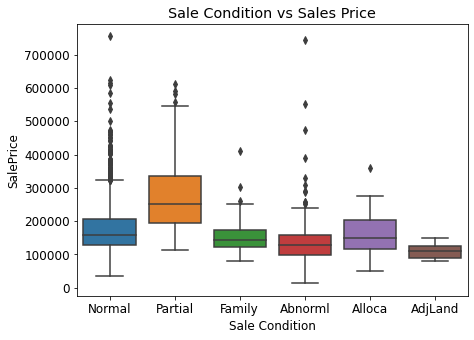

In [79]:
for item in list_2:
    plt.rcParams.update({'figure.figsize': (7.0, 5.0)})
    sns.boxplot(x = item, y = 'SalePrice', data = housing_data)
    plt.title(item + ' vs Sales Price')
    plt.show()

The above box plots charts look at our variables whose variables are of data type object.  The box plots show our mean and interquartile ranges of each variable compared with our target variable of sales price.  Again the results are promising and we see a number of variables that may help explain the sales price including:  MS Zoning, Street, Alley (we saw earlier that the difference in sales price for homes with paved vs gravel alleys persists even when we control for neighborhood).  We once again see a difference in sales prices among neighborhood and with other variables including Exter Qual, Bsmt Qual, Central Air, Pool QC,and Kitchen Qual.   

## Step 6: Random Forest Feature importance

looking only at numeric values

In [20]:
housing_X = housing_data[['Order',
 'PID',
 'MS SubClass',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'Lot Frontage',
 'Mas Vnr Area', 
 'SalePrice',                          
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area']]

In [129]:
list_X = ['Order','PID','MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
 '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
 'TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area',
 'Misc Val', 'Mo Sold', 'Yr Sold', 'Lot Frontage', 'Mas Vnr Area',                   
 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt',
 'Garage Cars', 'Garage Area']

In [21]:
#dropping the nan values in our quantitative variables
housing_X = housing_X.dropna()
housing_X.shape

(2274, 39)

In [22]:
housing_y = housing_X[['SalePrice']]
housing_y.shape

(2274, 1)

In [23]:
housing_X = housing_X.drop(columns=['SalePrice'])

In [24]:
#for item in list_2:
#    pj1 = housing_data[item].unique()
 #   print(item, pj1)

In [25]:
X = housing_X
y = housing_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)


In [26]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

C:\Users\BETH&A~1\AppData\Local\Temp/ipykernel_17880/2509619543.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor()

In [27]:
rf.feature_importances_

array([3.38417520e-03, 1.05755928e-02, 1.57333122e-03, 1.55201303e-02,
       6.56075306e-01, 2.92223337e-03, 1.01495974e-02, 5.73711241e-03,
       3.06601797e-02, 2.37898023e-02, 4.32483414e-05, 9.13148836e-02,
       5.55523912e-03, 5.88314073e-04, 1.18740658e-03, 2.24988647e-04,
       2.78973044e-03, 3.53835228e-03, 4.38020230e-03, 4.83169680e-03,
       6.11363032e-04, 1.03748037e-04, 4.95280489e-03, 1.07609291e-03,
       6.47616583e-05, 4.42563175e-03, 8.40722559e-04, 7.56232410e-03,
       5.42743438e-03, 2.11790936e-02, 3.13506989e-04, 4.19471494e-03,
       4.86297652e-02, 1.12815096e-03, 1.21100810e-04, 4.62358691e-03,
       7.57193046e-03, 1.23317435e-02])

Text(0.5, 1.0, 'Feature Importances for Numeric Values')

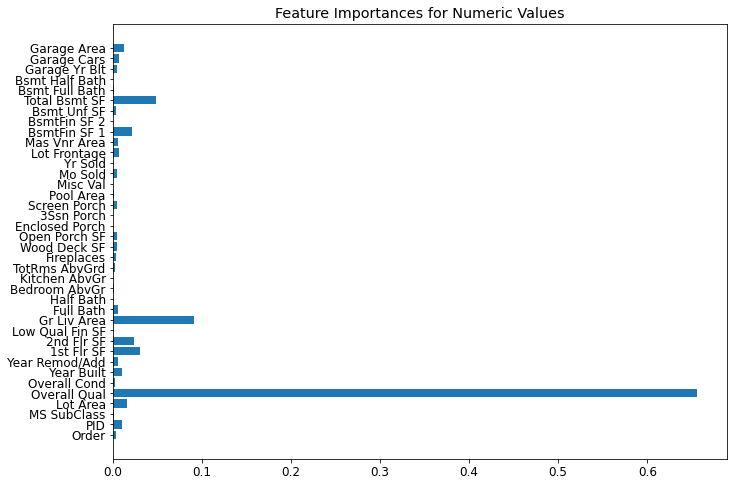

In [122]:
plt.rcParams.update({'figure.figsize': (11.0,8.0)})
plt.rcParams.update({'font.size': 12})

plt.barh(housing_X.columns, rf.feature_importances_)
plt.title("Feature Importances for Numeric Values")

Wow.  This is very interesting.  Obviously, overall quality stands out and being of particular importance in this analysis.  A few other explanatory variable including Gr Living Area (Sq Ft) and Total Basement SF also appear very relevant.  

###  Pearson Correlation

In [130]:
#  Calculate Pearson Correlation for select numeric variables with Sales Price

for item in list_X:
    my_rho = np.corrcoef(housing_X[item], housing_y['SalePrice'])
    print(item)
    print(my_rho)


Order
[[ 1.         -0.04286303]
 [-0.04286303  1.        ]]
PID
[[ 1.         -0.25108469]
 [-0.25108469  1.        ]]
MS SubClass
[[ 1.         -0.07979079]
 [-0.07979079  1.        ]]
Lot Area
[[1.         0.30917674]
 [0.30917674 1.        ]]
Overall Qual
[[1.         0.80394423]
 [0.80394423 1.        ]]
Overall Cond
[[ 1.         -0.16347134]
 [-0.16347134  1.        ]]
Year Built
[[1.         0.55962232]
 [0.55962232 1.        ]]
Year Remod/Add
[[1.         0.53823967]
 [0.53823967 1.        ]]
1st Flr SF
[[1.         0.63876168]
 [0.63876168 1.        ]]
2nd Flr SF
[[1.         0.25242517]
 [0.25242517 1.        ]]
Low Qual Fin SF
[[ 1.         -0.02568644]
 [-0.02568644  1.        ]]
Gr Liv Area
[[1.         0.71417074]
 [0.71417074 1.        ]]
Full Bath
[[1.         0.55993541]
 [0.55993541 1.        ]]
Half Bath
[[1.         0.26906771]
 [0.26906771 1.        ]]
Bedroom AbvGr
[[1.         0.14714328]
 [0.14714328 1.        ]]
Kitchen AbvGr
[[ 1.         -0.11092615]
 [-0.11

## Step 7:  Deeper Dive into Most Relevant Variables

In the above analysis, a handfull of variables stood out as explanatory variables.  These includ:  Overall Qual, Year Built, Gr Liv Ar also correlated are Total Basement Sf, Garage Cars , and Garage Area.  In addition, MS Zoning, Street, Alley (we saw earlier that the difference in sales price for homes with paved vs gravel alleys persists even when we control for neighborhood). We once again see a difference in sales prices among neighborhood and with other variables including Exter Qual, Bsmt Qual, Central Air, and Kitchen Qual.  Here lets zoom in on these variables and see what stands out.  

#### Overall Qual

Our Feature Importance Analysis told us this was the most important feature.  Lets take a deeper dive.

Text(0.5, 1.0, 'Histogram of variable Overall Quality')

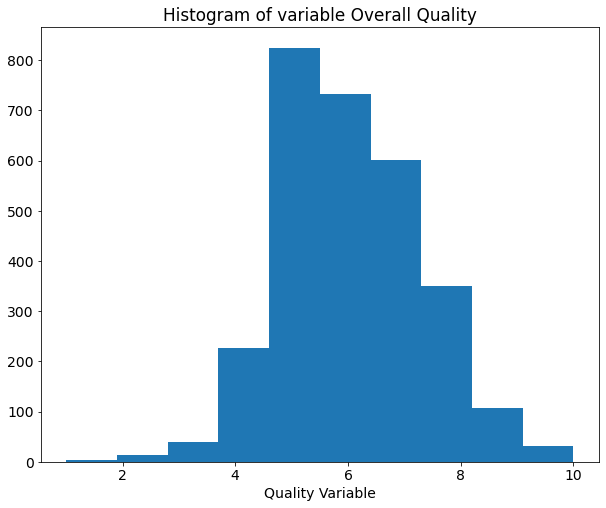

In [110]:
#  Histogram of overall quality variable
plt.hist(housing_data['Overall Qual'])
plt.xlabel('Quality Variable')
plt.title('Histogram of variable Overall Quality')

In [30]:
# First in location we are looking at the number of sales by overall quality.
df_nb = housing_data['Overall Qual'].value_counts()
df_nb

5     825
6     732
7     602
8     350
4     226
9     107
3      40
10     31
2      13
1       4
Name: Overall Qual, dtype: int64

In [31]:
#  Sales Price divided out by overall quality

df2 = housing_data[['Overall Qual', 'SalePrice']].groupby('Overall Qual').agg('mean')

df3 = round(df2, 2)
df4 = df3.sort_values(by = 'SalePrice', ascending = False)
df4

,SalePrice
Overall Qual,
10,450217.32
9,368336.77
8,270913.59
7,205025.76
6,162130.32
5,134752.52
4,106485.10
3,83185.98
2,52325.31


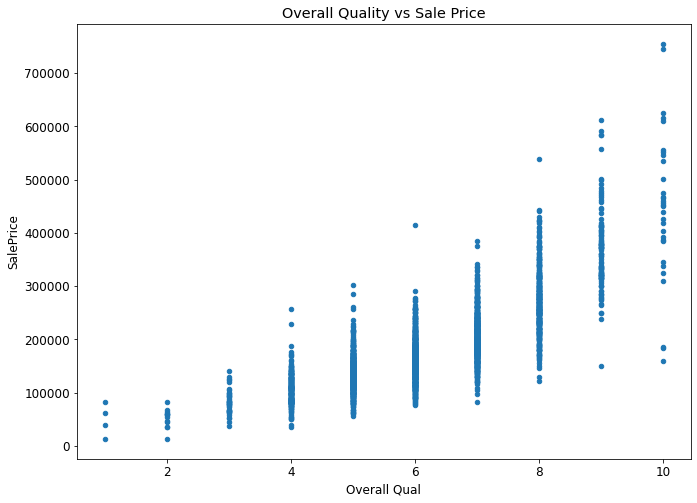

In [32]:
# Plotting overall quality vs sales price

housing_data.plot(x = 'Overall Qual', y = 'SalePrice', kind = 'scatter')
plt.title("Overall Quality vs Sale Price")
plt.show()

#### Year Built


Text(0.5, 1.0, 'Histogram of target variable Year Built')

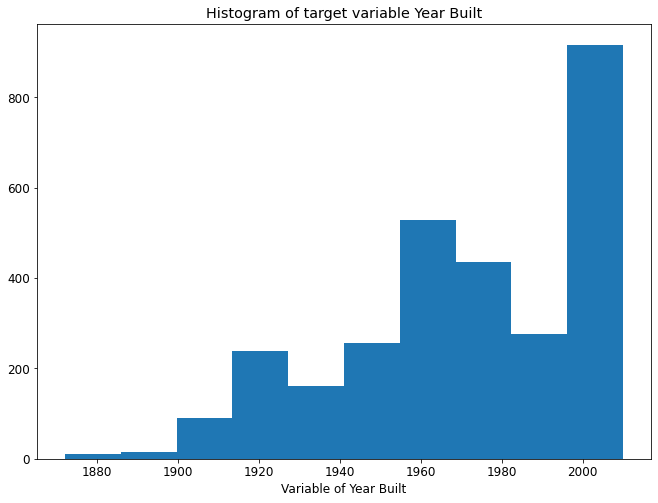

In [33]:
plt.hist(housing_data['Year Built'])
plt.xlabel('Variable of Year Built')
plt.title('Histogram of target variable Year Built')

Many modern homes in Ames were built fairly recently

In [34]:
df2 = housing_data[['Year Built', 'SalePrice']].groupby('Year Built').agg('mean')

df3 = round(df2, 2)
df4 = df3.sort_values(by = 'SalePrice', ascending = False)
df4

,SalePrice
Year Built,
1893,325000.00
2008,314300.22
1892,291250.00
2010,283116.00
2009,277097.44
...,...
1902,97500.00
1875,94000.00
1907,93369.00


Probably too many 'bins' for this to make sense of.  The histogram was more useful.  Lets look at a scatter plot.

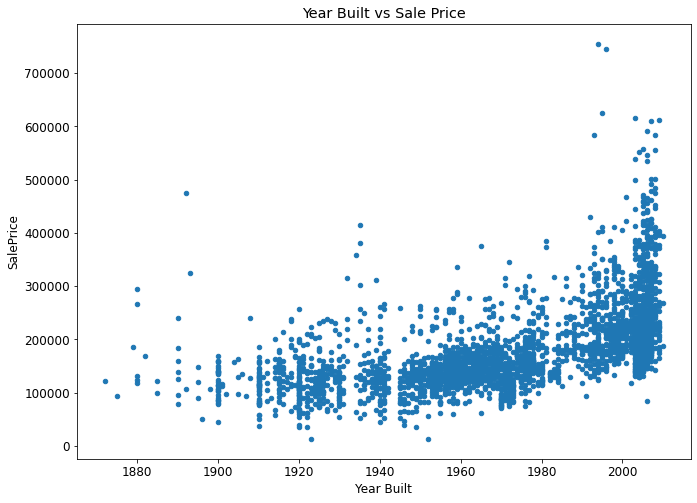

In [35]:
housing_data.plot(x = 'Year Built', y = 'SalePrice', kind = 'scatter')
plt.title("Year Built vs Sale Price")
plt.show()

Looks like many of the more expensive homes are built more recently.

#### Gross Livable Area SF

Text(0.5, 1.0, 'Histogram of variable Square Feet')

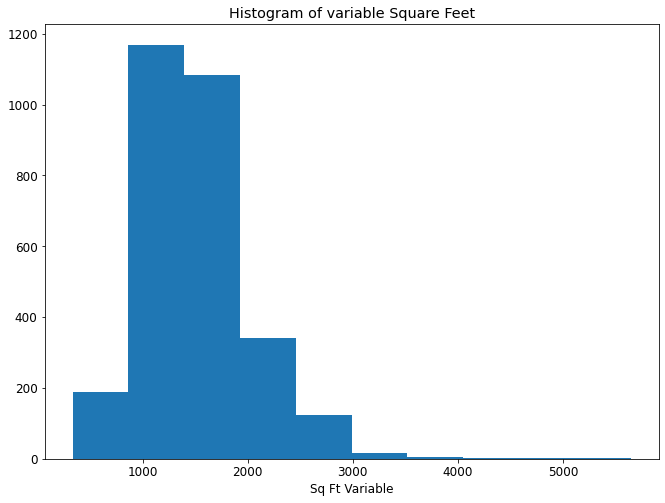

In [36]:
plt.hist(housing_data['Gr Liv Area'])
plt.xlabel('Sq Ft Variable')
plt.title('Histogram of variable Square Feet')

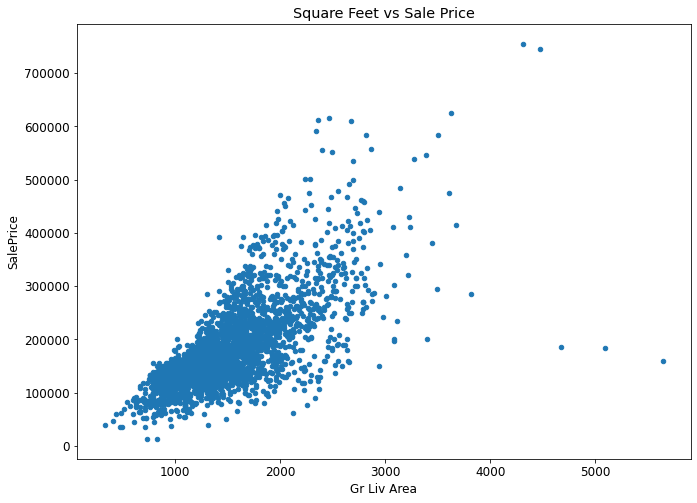

In [37]:
housing_data.plot(x = 'Gr Liv Area', y = 'SalePrice', kind = 'scatter')
plt.title("Square Feet vs Sale Price")
plt.show()

#### Basement SF

Text(0.5, 1.0, 'Histogram of Basement SF variable')

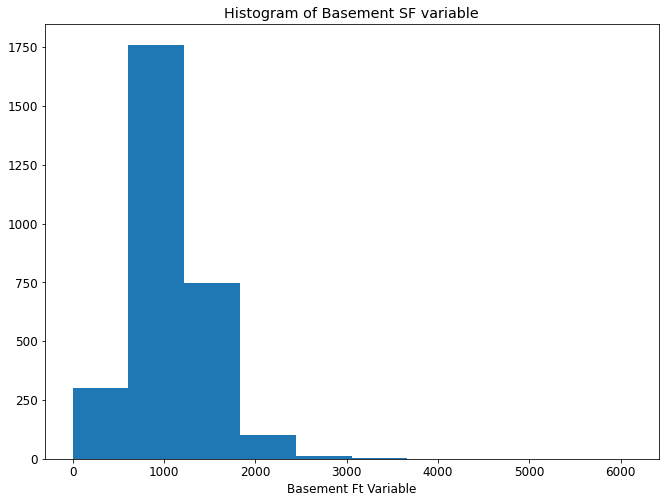

In [38]:
plt.hist(housing_data['Total Bsmt SF'])
plt.xlabel('Basement Ft Variable')
plt.title('Histogram of Basement SF variable')

I would have thought fewer homes had basements...

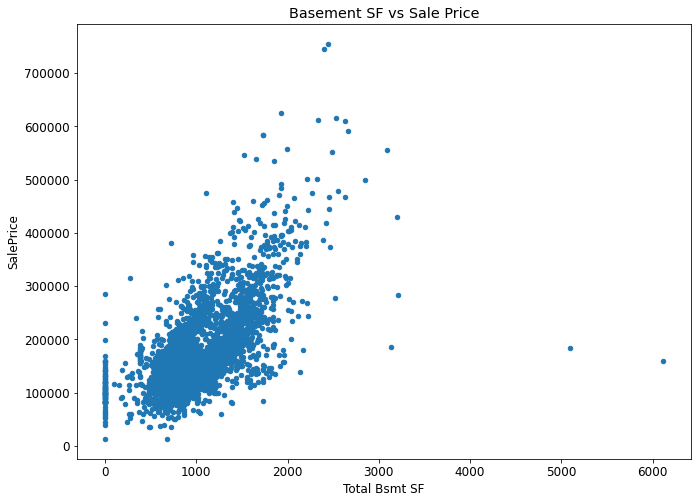

In [39]:
housing_data.plot(x = 'Total Bsmt SF', y = 'SalePrice', kind = 'scatter')
plt.title("Basement SF vs Sale Price")
plt.show()

#### Garage Area

Text(0.5, 1.0, 'Histogram of Garage Area variable')

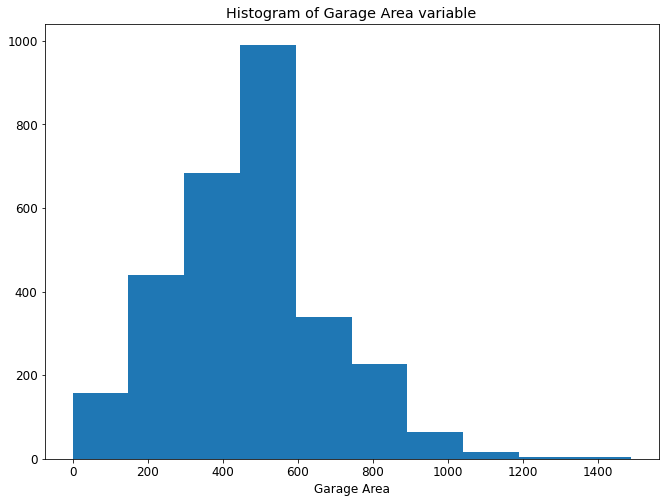

In [40]:
plt.hist(housing_data['Garage Area'])
plt.xlabel('Garage Area')
plt.title('Histogram of Garage Area variable')

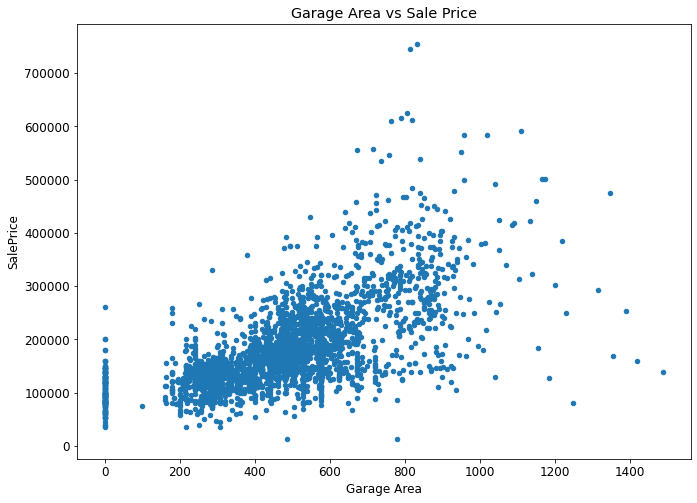

In [41]:
housing_data.plot(x = 'Garage Area', y = 'SalePrice', kind = 'scatter')
plt.title("Garage Area vs Sale Price")
plt.show()

#### Garage SF


Text(0.5, 1.0, 'Histogram of Garage Cars variable')

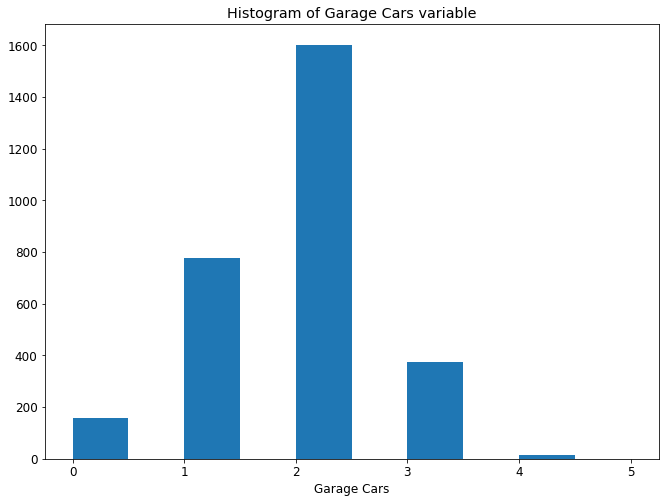

In [42]:
plt.hist(housing_data['Garage Cars'])
plt.xlabel('Garage Cars')
plt.title('Histogram of Garage Cars variable')

Thankfully, 4 car garages are rare.  Some homes have no garage 

In [43]:
df2 = housing_data[['Garage Cars', 'SalePrice']].groupby('Garage Cars').agg('mean')

df3 = round(df2, 2)
df4 = df3.sort_values(by = 'SalePrice', ascending = False)
df4

,SalePrice
Garage Cars,
3.0,310304.62
4.0,228748.69
2.0,183562.10
1.0,127267.42
5.0,126500.00
0.0,104949.25


homes with three car garage seem to command a premium whereas no car garage has the lowest mean sales price

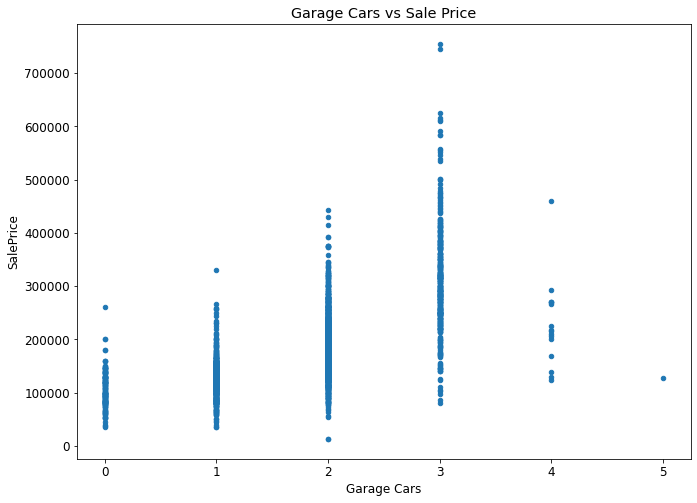

In [44]:
housing_data.plot(x = 'Garage Cars', y = 'SalePrice', kind = 'scatter')
plt.title("Garage Cars vs Sale Price")
plt.show()

#### Neighborhood

In [45]:
# First in location we are looking at the number of sales by neighborhood.
df_nb = housing_data['Neighborhood'].value_counts()
df_nb

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

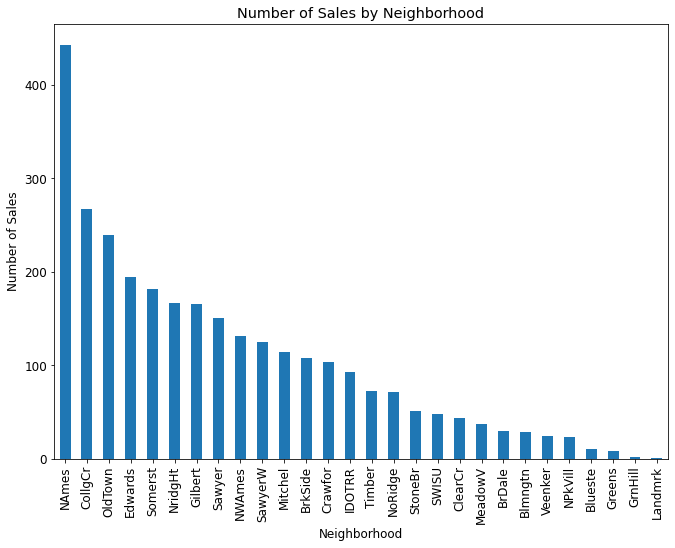

In [46]:
df_nb.plot(kind = 'bar')
plt.title("Number of Sales by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Sales")
plt.show()

In [47]:
#  Now we will pull in average sales price by neighborhood.


df2 = housing_data[['Neighborhood', 'SalePrice']].groupby('Neighborhood').agg('mean')

df3 = round(df2, 2)
df4 = df3.sort_values(by = 'SalePrice', ascending = False)
df4

,SalePrice
Neighborhood,
NoRidge,330319.13
StoneBr,324229.20
NridgHt,322018.27
GrnHill,280000.00
Veenker,248314.58
Timber,246599.54
Somerst,229707.32
ClearCr,208662.09
Crawfor,207550.83


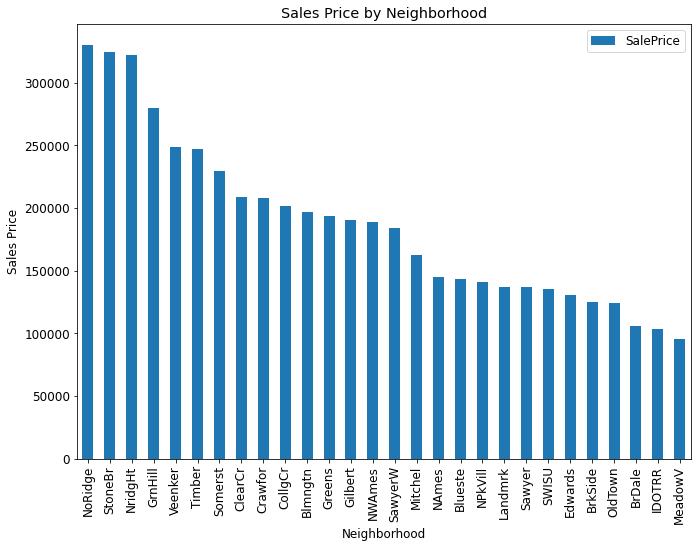

In [48]:
#  Lets have a look at sales price by neighborhood in a bar graph
df4.plot(kind = 'bar')
plt.title("Sales Price by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Sales Price")
plt.show()

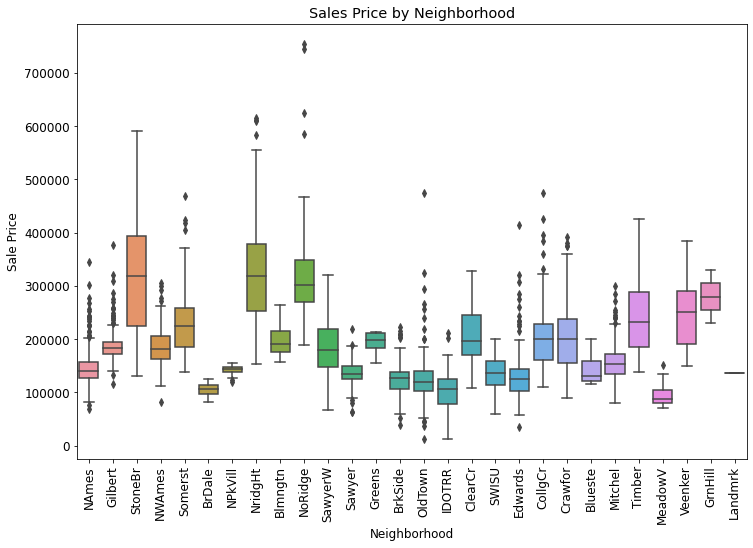

In [49]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x= housing_data['Neighborhood'], y=housing_data['SalePrice'], data=df4)
plt.xticks(rotation='vertical')
plt.ylabel('Sale Price')
plt.title("Sales Price by Neighborhood")
plt.xlabel('Neighborhood');

Clearly certain neighborhoods are more sought after than others.  The mean sales price in NoRidge is nearly 3x as the mean sales price in MeadowV.

#### MS Zoning

In [85]:
df_zon = housing_data['MS Zoning'].value_counts()
df_zon

RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64

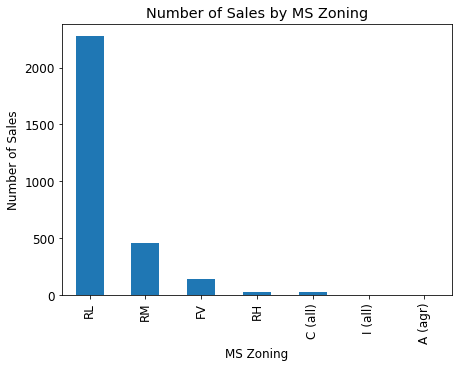

In [86]:
df_zon.plot(kind = 'bar')
plt.title("Number of Sales by MS Zoning")
plt.xlabel("MS Zoning")
plt.ylabel("Number of Sales")
plt.show()

In [88]:
#  Now we will pull in average sales price by zoning.


df2 = housing_data[['MS Zoning', 'SalePrice']].groupby('MS Zoning').agg('mean')

df3 = round(df2, 2)
df4 = df3.sort_values(by = 'SalePrice', ascending = False)
df4

,SalePrice
MS Zoning,
FV,218986.95
RL,191283.25
RH,136419.78
RM,126781.39
I (all),80312.50
C (all),79795.04
A (agr),47300.00


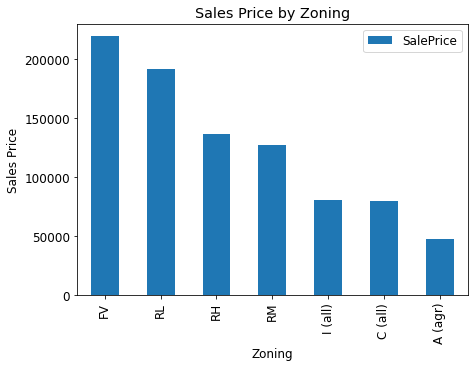

In [90]:
#  Lets have a look at sales price by zoning in a bar graph
df4.plot(kind = 'bar')
plt.title("Sales Price by Zoning")
plt.xlabel("Zoning")
plt.ylabel("Sales Price")
plt.show()

Clearly the zoning of the land is related to the sales price of the home.


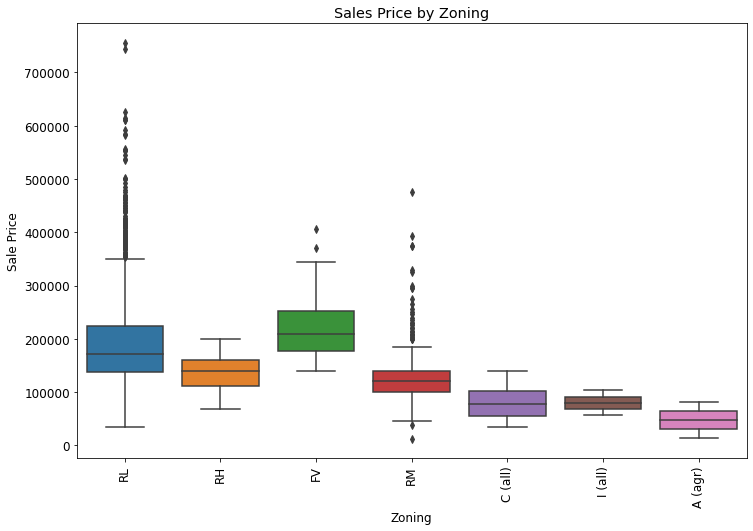

In [92]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x= housing_data['MS Zoning'], y=housing_data['SalePrice'], data=df4)
plt.xticks(rotation='vertical')
plt.ylabel('Sale Price')
plt.title("Sales Price by Zoning")
plt.xlabel('Zoning');

#### Street


In [97]:
df_str = housing_data['Street'].value_counts()
df_str

Pave    2918
Grvl      12
Name: Street, dtype: int64

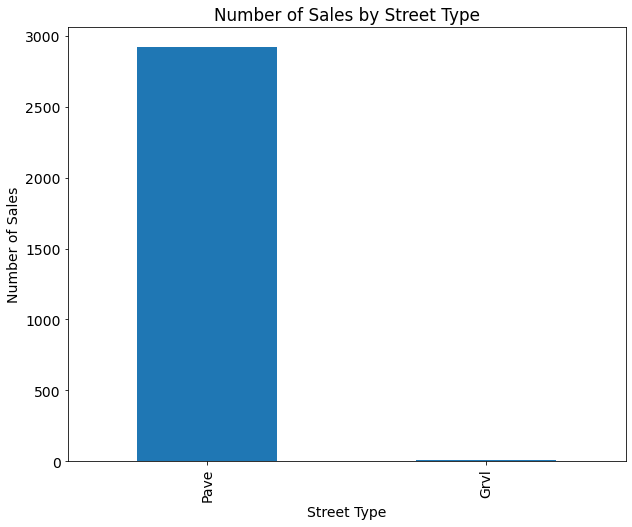

In [98]:
df_str.plot(kind = 'bar')
plt.title("Number of Sales by Street Type")
plt.xlabel("Street Type")
plt.ylabel("Number of Sales")
plt.show()

In [99]:
df_str = housing_data[['Street', 'SalePrice']].groupby('Street').agg('mean')

df_str2 = round(df_str, 2)
df_str4 = df_str2.sort_values(by = 'SalePrice', ascending = False)
df_str4

,SalePrice
Street,
Pave,181100.92
Grvl,106663.33


In [100]:
# So lets see if there is a difference in average sales price within a neighborhood 
df_str1 = housing_data[['Street', 'Neighborhood', 'SalePrice']].groupby(['Neighborhood', 'Street']).agg('mean')

df_str2 = round(df_str1, 2)
df_str33 = df_str2.sort_values(by = 'Neighborhood', ascending = False)
df_str33

SalePrice
Neighborhood Street           
Veenker      Pave    248314.58
Timber       Pave    247707.39
             Grvl    207825.00
StoneBr      Pave    324229.20
Somerst      Pave    229707.32
SawyerW      Pave    184070.18
Sawyer       Pave    136751.15
SWISU        Pave    135071.94
OldTown      Pave    123991.89
NridgHt      Pave    322018.27
NoRidge      Pave    330319.13
NWAmes       Pave    188406.91
NPkVill      Pave    140710.87
NAmes        Pave    145097.35
Mitchel      Pave    162226.63
MeadowV      Pave     95756.49
Landmrk      Pave    137000.00
IDOTRR       Pave    106557.81
             Grvl     73950.75
GrnHill      Pave    280000.00
Greens       Pave    193531.25
Gilbert      Pave    190868.79
             Grvl    154204.00
Edwards      Pave    130907.34
             Grvl    118500.00
Crawfor      Pave    207550.83
CollgCr      Pave    201803.43
ClearCr      Pave    208662.09
BrkSide      Pave    124756.25
BrDale       Pave    105608.33
Blueste      Pave    143590.00
Blmngtn      Pave    196661.68

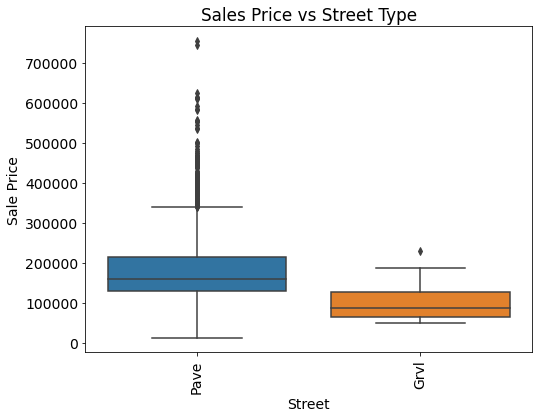

In [101]:
plt.subplots(figsize=(8, 6))
sns.boxplot(x= housing_data['Street'], y=housing_data['SalePrice'], data=df4)
plt.xticks(rotation='vertical')
plt.ylabel('Sale Price')
plt.xlabel('Street')
plt.title('Sales Price vs Street Type');

#### Alley

In [104]:
df_all = housing_data['Alley'].value_counts()
df_all

Grvl    120
Pave     78
Name: Alley, dtype: int64

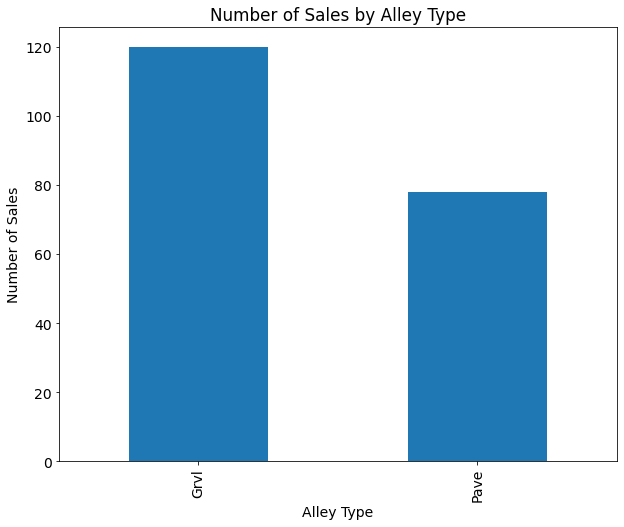

In [105]:
df_all.plot(kind = 'bar')
plt.title("Number of Sales by Alley Type")
plt.xlabel("Alley Type")
plt.ylabel("Number of Sales")
plt.show()

In [107]:
df_all = housing_data[['Alley', 'SalePrice']].groupby('Alley').agg('mean')

df_all2 = round(df_all, 2)
df_all4 = df_all2.sort_values(by = 'SalePrice', ascending = False)
df_all4

,SalePrice
Alley,
Pave,176945.36
Grvl,123556.91


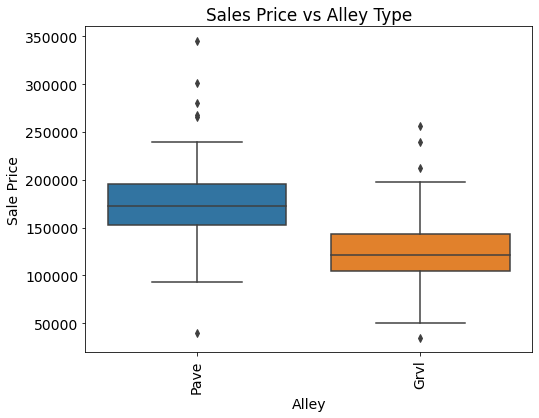

In [108]:
plt.subplots(figsize=(8, 6))
sns.boxplot(x= housing_data['Alley'], y=housing_data['SalePrice'], data=df4)
plt.xticks(rotation='vertical')
plt.ylabel('Sale Price')
plt.xlabel('Alley')
plt.title('Sales Price vs Alley Type');

#### Exter Qual

In [50]:
df_ex = housing_data['Exter Qual'].value_counts()
df_ex

TA    1799
Gd     989
Ex     107
Fa      35
Name: Exter Qual, dtype: int64

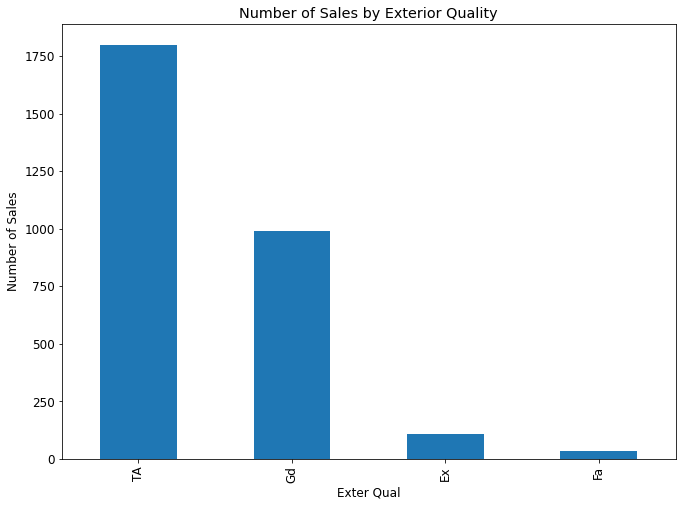

In [51]:
df_ex.plot(kind = 'bar')
plt.title("Number of Sales by Exterior Quality")
plt.xlabel("Exter Qual")
plt.ylabel("Number of Sales")
plt.show()

In [52]:
df_ex = housing_data[['Exter Qual', 'SalePrice']].groupby('Exter Qual').agg('mean')

df_ex2 = round(df_ex, 2)
df_ex4 = df_ex2.sort_values(by = 'SalePrice', ascending = False)
df_ex4

,SalePrice
Exter Qual,
Ex,377918.62
Gd,230756.38
TA,143373.97
Fa,89923.74


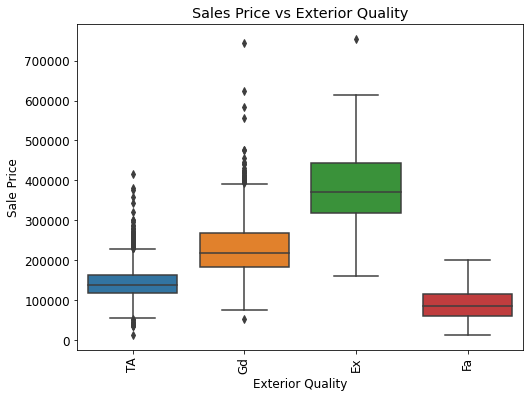

In [53]:
plt.subplots(figsize=(8, 6))
sns.boxplot(x= housing_data['Exter Qual'], y=housing_data['SalePrice'], data=df4)
plt.xticks(rotation='vertical')
plt.ylabel('Sale Price')
plt.xlabel('Exterior Quality')
plt.title('Sales Price vs Exterior Quality');

#### Bsmt Quality

In [54]:
df_bs = housing_data['Bsmt Qual'].value_counts()
df_bs

TA    1283
Gd    1219
Ex     258
Fa      88
Po       2
Name: Bsmt Qual, dtype: int64

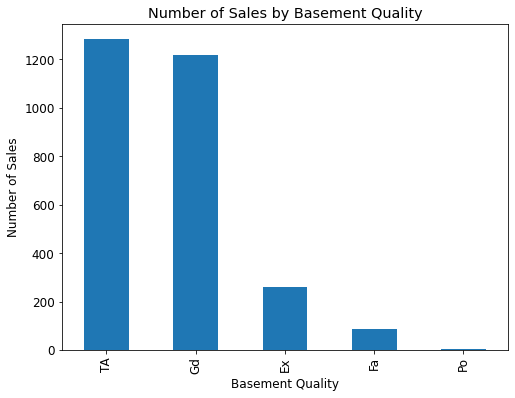

In [55]:
plt.subplots(figsize=(8, 6))
df_bs.plot(kind = 'bar')
plt.title("Number of Sales by Basement Quality")
plt.xlabel("Basement Quality")
plt.ylabel("Number of Sales")
plt.show()

In [56]:
df_bs = housing_data[['Bsmt Qual', 'SalePrice']].groupby('Bsmt Qual').agg('mean')

df_bs2 = round(df_bs, 2)
df_bs4 = df_bs2.sort_values(by = 'SalePrice', ascending = False)
df_bs4

,SalePrice
Bsmt Qual,
Ex,333369.31
Gd,201726.77
TA,139847.39
Fa,109635.24
Po,84950.00


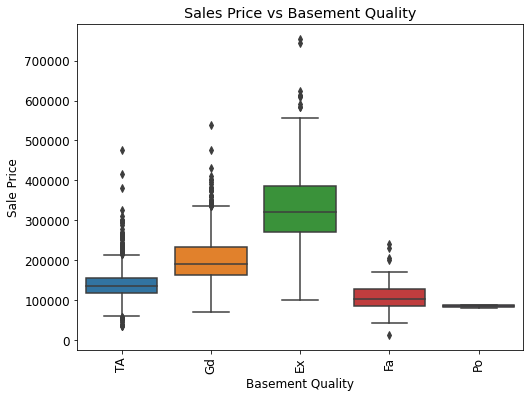

In [57]:
plt.subplots(figsize=(8, 6))
sns.boxplot(x= housing_data['Bsmt Qual'], y=housing_data['SalePrice'], data=df4)
plt.xticks(rotation='vertical')
plt.ylabel('Sale Price')
plt.xlabel('Basement Quality')
plt.title('Sales Price vs Basement Quality');

#### Central Air

In [58]:
df_ca = housing_data['Central Air'].value_counts()
df_ca

Y    2734
N     196
Name: Central Air, dtype: int64

In [59]:
df_ca = housing_data[['Central Air', 'SalePrice']].groupby('Central Air').agg('mean')

df_ca2 = round(df_ca, 2)
df_ca4 = df_ca2.sort_values(by = 'SalePrice', ascending = False)
df_ca4

,SalePrice
Central Air,
Y,186452.79
N,101890.48


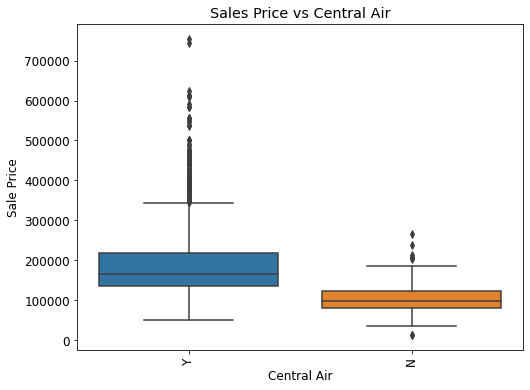

In [60]:
plt.subplots(figsize=(8, 6))
sns.boxplot(x= housing_data['Central Air'], y=housing_data['SalePrice'], data=df4)
plt.xticks(rotation='vertical')
plt.ylabel('Sale Price')
plt.xlabel('Central Air')
plt.title('Sales Price vs Central Air');

#### Pool QC

In [81]:
df_pq= housing_data['Pool QC'].value_counts()
df_pq

Ex    4
Gd    4
TA    3
Fa    2
Name: Pool QC, dtype: int64

Right off the bat we notice that not very many pools in our data

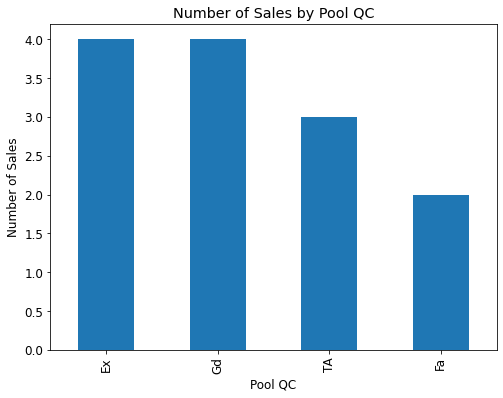

In [83]:
plt.subplots(figsize=(8, 6))
df_pq.plot(kind = 'bar')
plt.title("Number of Sales by Pool QC")
plt.xlabel("Pool QC")
plt.ylabel("Number of Sales")
plt.show()

In [84]:
df_pq = housing_data[['Pool QC', 'SalePrice']].groupby('Pool QC').agg('mean')

df_pq2 = round(df_pq, 2)
df_pq4 = df_pq2.sort_values(by = 'SalePrice', ascending = False)
df_pq4

,SalePrice
Pool QC,
Ex,477500.0
Gd,216492.5
Fa,215500.0
TA,170500.0


#### Kitchen Qual

In [61]:
df_kq= housing_data['Kitchen Qual'].value_counts()
df_kq

TA    1494
Gd    1160
Ex     205
Fa      70
Po       1
Name: Kitchen Qual, dtype: int64

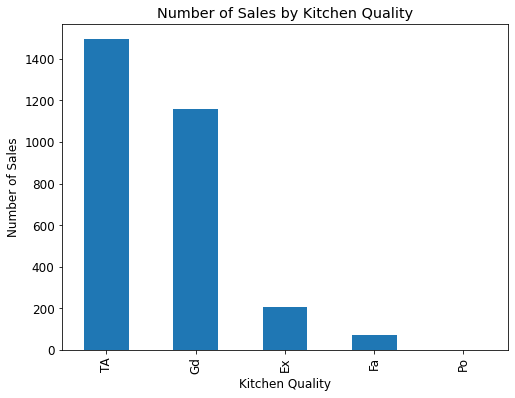

In [62]:
plt.subplots(figsize=(8, 6))
df_kq.plot(kind = 'bar')
plt.title("Number of Sales by Kitchen Quality")
plt.xlabel("Kitchen Quality")
plt.ylabel("Number of Sales")
plt.show()

In [63]:
df_kq = housing_data[['Kitchen Qual', 'SalePrice']].groupby('Kitchen Qual').agg('mean')

df_kq2 = round(df_kq, 2)
df_kq4 = df_kq2.sort_values(by = 'SalePrice', ascending = False)
df_kq4

,SalePrice
Kitchen Qual,
Ex,337339.34
Gd,210835.58
TA,139549.95
Po,107500.00
Fa,105907.04


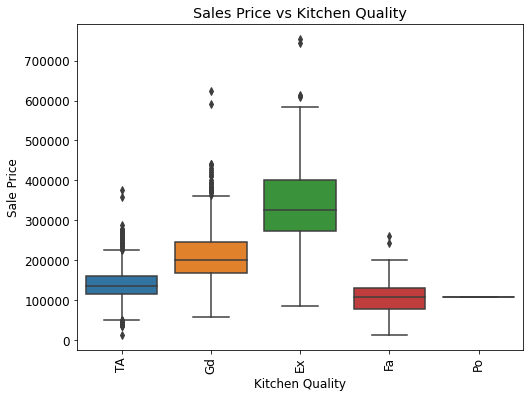

In [64]:
plt.subplots(figsize=(8, 6))
sns.boxplot(x= housing_data['Kitchen Qual'], y=housing_data['SalePrice'], data=df4)
plt.xticks(rotation='vertical')
plt.ylabel('Sale Price')
plt.xlabel('Kitchen Quality')
plt.title('Sales Price vs Kitchen Quality');

## Step 8 Summary of findings

We have continued our investigation on the Ames Housing Data.  In particular have looked more closely into our target (Sales Price) by conducting univariate analysis on this variable.  In addition we have looked into the relationship between our other variables plotting each variable against the target variable to visualize the relationship between each variable.  For our numeric variables we have gone further by running a random forest feature importance model and by calculating the pearson correlation coefficient where possible.  